In [1]:
# 박조은 강사님의 edwith 부스트코스의 데이터분석 강의를 보고 필사한 것이며
# 알게 된 점이나 느낀 점등을 옆에 주석으로 달아놓은 자료 입니다.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe() #Glucose	BloodPressure	SkinThickness	Insulin	BMI 최소가 0인데 말이안됨 이것들이 결측치 아닐까??

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df_null=df.isnull().sum()
df_null

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
feature_names=df.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화

In [9]:
cols=feature_names[1:-2]
cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [10]:
df_null=df[cols].replace(0,np.nan)
df_null.isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

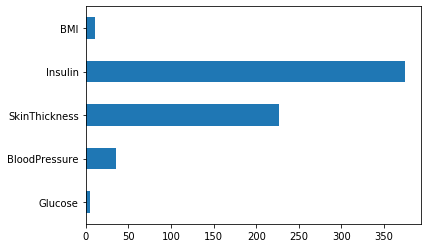

In [11]:
df_null.isnull().sum().plot.barh()

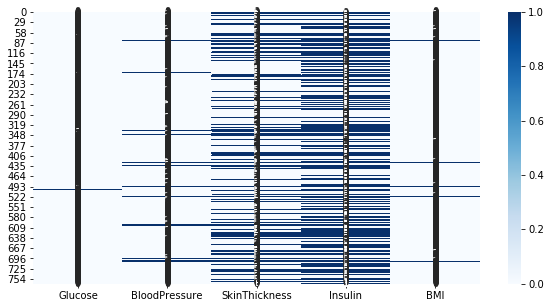

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(df_null.isnull(),cmap='Blues',annot=True)

In [13]:
df['Outcome'].value_counts()  #빈도수 세기 

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
df_po=df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()  #pregnancie를 컬럼으로 만든다
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


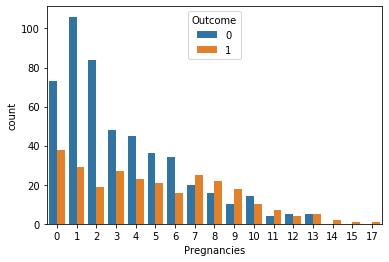

In [15]:
sns.countplot(data=df,x='Pregnancies',hue='Outcome')

In [16]:
#범주형 데이터로 만들기
df['Pregnancies_high']=df['Pregnancies']>6
df[['Pregnancies','Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


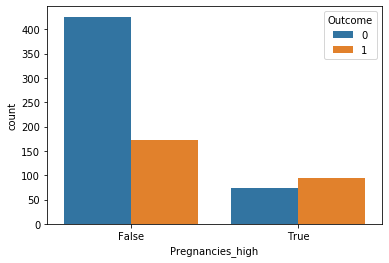

In [17]:
sns.countplot(data=df,x='Pregnancies_high',hue='Outcome')

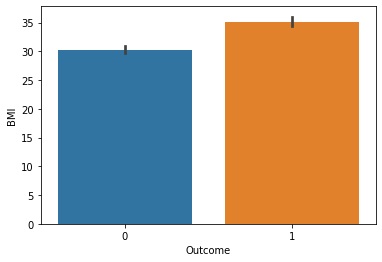

In [18]:
sns.barplot(data=df,x='Outcome',y='BMI')

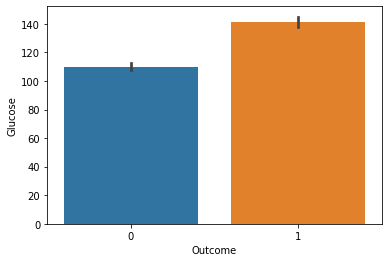

In [19]:
sns.barplot(data=df,x='Outcome',y='Glucose')

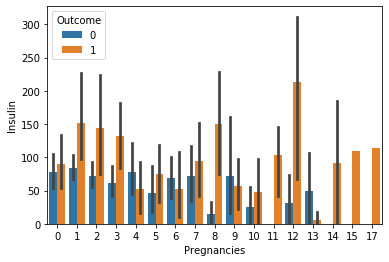

In [20]:
sns.barplot(data=df,x='Pregnancies',y='Insulin',hue='Outcome')

In [21]:
df_0=df[df['Outcome']==0]
df_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
1,1,85,66,29,0,26.6,0.351,31,0,False
3,1,89,66,23,94,28.1,0.167,21,0,False
5,5,116,74,0,0,25.6,0.201,30,0,False
7,10,115,0,0,0,35.3,0.134,29,0,True
10,4,110,92,0,0,37.6,0.191,30,0,False
...,...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0,True
763,10,101,76,48,180,32.9,0.171,63,0,True
764,2,122,70,27,0,36.8,0.340,27,0,False
765,5,121,72,23,112,26.2,0.245,30,0,False


In [22]:
#여러 plot들을 알려주시지만 솔직히 이런거는 쓸때나 기억나고 신기하기만하고 별거 없으니 패스

In [23]:
df_matrix=df.iloc[:,:-2].replace(0,np.nan)
df_matrix['Outcome']=df['Outcome']
df_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [24]:
#상관관계 

df_corr=df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


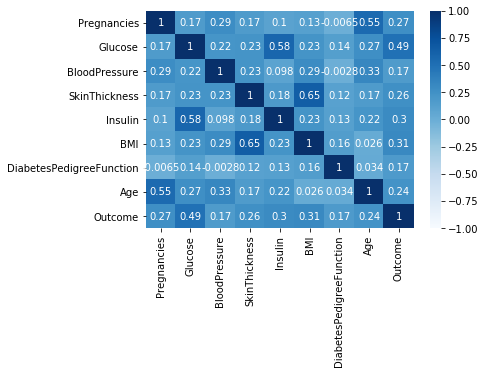

In [25]:
sns.heatmap(df_corr,vmax=1,vmin=-1,cmap='Blues',annot=True)

In [26]:
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64